# 쇼핑몰 지점별 매출액 예측 경진대회
# 결측치 0

## 라이브러리

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 경로 설정

In [45]:
import os
os.chdir('C:\\Users\\82107\\OneDrive\\바탕 화면\\동아리\\쇼핑몰 매출액 예측 경진대회\\dataset')
os.getcwd()

'C:\\Users\\82107\\OneDrive\\바탕 화면\\동아리\\쇼핑몰 매출액 예측 경진대회\\dataset'

## 데이터 불러오기

- 데이터 특징 살펴보기

In [46]:
df=pd.read_csv('train.csv')
df.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [47]:
df.tail()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20
6254,6255,45,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,8.684,False,713173.95


In [48]:
df.shape

(6255, 13)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [50]:
max(df['Weekly_Sales'])

3818686.45

In [51]:
min(df['Weekly_Sales'])

209986.25

In [52]:
df.isnull().sum()

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

In [53]:
df['Store'].value_counts() ## store 45개 있음 (한 스토어 당 139개의 데이터 존재)

1     139
24    139
26    139
27    139
28    139
29    139
30    139
31    139
32    139
33    139
34    139
35    139
36    139
37    139
38    139
39    139
40    139
41    139
42    139
43    139
44    139
25    139
23    139
2     139
22    139
3     139
4     139
5     139
6     139
7     139
8     139
9     139
10    139
11    139
12    139
13    139
14    139
15    139
16    139
17    139
18    139
19    139
20    139
21    139
45    139
Name: Store, dtype: int64

In [54]:
df1=df.copy()

In [55]:
df1

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


## IsHoliday 타입 변환

- bool타입 이어서 int로 변환

In [13]:
df1['IsHoliday']=df1['IsHoliday'].astype(int) ## False->0, True->1로 바꾸기 

In [14]:
df1[['IsHoliday']]

,IsHoliday
0,0
1,1
2,0
3,0
4,0
...,...
6250,0
6251,1
6252,0
6253,0


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   int32  
 12  Weekly_Sales  6255 non-null   float64
dtypes: float64(9), int32(1), int64(2), object(1)
memory usage: 611.0+ KB


In [16]:
df1[(df1['Store']==1)] ## 날짜는 2010/02/05 ~ 2012/09/28 까지 모든 스토어가 동일함

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,0,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,1,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,0,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,0,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,0,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,1,31/08/2012,80.49,3.638,21442.73,102.32,21.70,13209.64,3032.96,6.908,0,1582083.40
135,136,1,07/09/2012,83.96,3.730,5204.68,35.74,50.94,4120.32,2737.17,6.908,1,1661767.33
136,137,1,14/09/2012,74.97,3.717,17212.52,7.00,18.79,1523.11,7992.72,6.908,0,1517428.87
137,138,1,21/09/2012,69.87,3.721,6352.30,7.64,4.69,1010.06,6456.71,6.908,0,1506126.06


In [18]:
df1[(df1['Store']==22)]

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
2919,2920,22,05/02/2010,24.36,2.788,NaN,NaN,NaN,NaN,NaN,8.283,0,1033017.37
2920,2921,22,12/02/2010,28.14,2.771,NaN,NaN,NaN,NaN,NaN,8.283,1,1022571.25
2921,2922,22,19/02/2010,31.96,2.747,NaN,NaN,NaN,NaN,NaN,8.283,0,988467.61
2922,2923,22,26/02/2010,35.98,2.753,NaN,NaN,NaN,NaN,NaN,8.283,0,899761.48
2923,2924,22,05/03/2010,36.82,2.766,NaN,NaN,NaN,NaN,NaN,8.283,0,1009201.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,3054,22,31/08/2012,71.93,3.884,37707.43,40.66,119.53,6761.03,2307.61,7.753,0,1022270.86
3054,3055,22,07/09/2012,73.30,3.921,12941.56,4.00,37.34,2510.10,3346.55,7.753,1,996628.80
3055,3056,22,14/09/2012,66.42,3.988,7069.56,3.44,8.43,499.91,6011.90,7.753,0,918049.28
3056,3057,22,21/09/2012,63.38,4.056,7150.28,106.01,19.00,1217.30,7556.34,7.753,0,921612.53


In [19]:
df1[(df1['Store']==1)&(df1['IsHoliday']==1)][['Date']].count() ## 모두 다 공휴일 포함-> 공휴일은 총 10번 

Date    10
dtype: int64

In [19]:
## Promotion1~5 까지 모두 NaN인 값 찾기
df1[(df1['Store']==1)&(df1['Promotion1'].isnull())&(df1['Promotion2'].isnull())&(df1['Promotion3'].isnull())&(df1['Promotion4'].isnull())&(df1['Promotion5'].isnull())]
## 모든 store가 2011/11/04 까지 Promotion1~5 가 NaN 값
## Promotion1~5 가 모두 NaN인 값은 각각 4140개

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,0,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,1,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,0,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,0,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,0,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,88,1,07/10/2011,69.31,3.285,NaN,NaN,NaN,NaN,NaN,7.866,0,1630989.95
88,89,1,14/10/2011,71.74,3.274,NaN,NaN,NaN,NaN,NaN,7.866,0,1493525.93
89,90,1,21/10/2011,63.71,3.353,NaN,NaN,NaN,NaN,NaN,7.866,0,1502562.78
90,91,1,28/10/2011,66.57,3.372,NaN,NaN,NaN,NaN,NaN,7.866,0,1445249.09


In [20]:
df1[df1['id']==93]

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
92,93,1,11/11/2011,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,7.866,0,1594938.89


In [21]:
df1.isnull().sum()

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

In [22]:
df1[['Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5']].describe()

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5
count,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000
mean,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173
std,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908
min,0.270000,-265.760000,-29.100000,0.410000,135.160000
25%,1844.295000,39.755000,4.700000,499.895000,1742.305000
50%,5221.140000,205.410000,24.600000,1532.630000,3226.410000
75%,9199.242500,1931.005000,104.010000,3640.905000,5444.030000
max,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000


# 시각화

- Promotion1

<AxesSubplot:xlabel='Promotion1'>

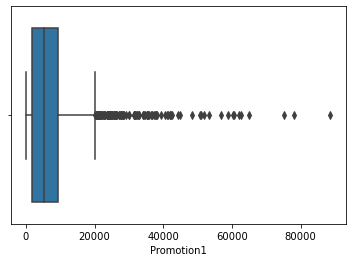

In [23]:
sns.boxplot(x='Promotion1', data=df1)

- Promotion2

<AxesSubplot:xlabel='Promotion2'>

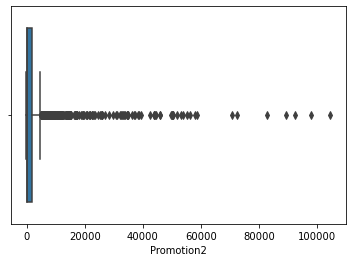

In [24]:
sns.boxplot(x='Promotion2', data=df1)

- Promotion3

<AxesSubplot:xlabel='Promotion3'>

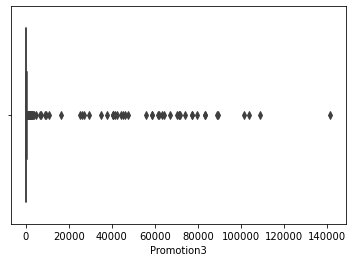

In [25]:
sns.boxplot(x='Promotion3', data=df1)

- Promotion4

<AxesSubplot:xlabel='Promotion4'>

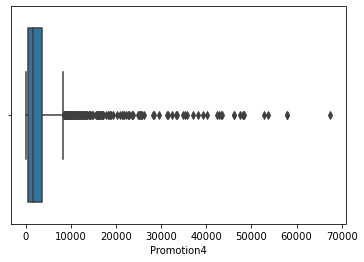

In [26]:
sns.boxplot(x='Promotion4', data=df1)

- Promotion5

<AxesSubplot:xlabel='Promotion5'>

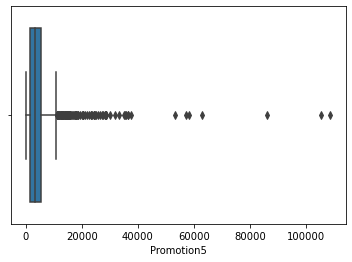

In [27]:
sns.boxplot(x='Promotion5', data=df1)

- IsHoliday

<AxesSubplot:xlabel='IsHoliday', ylabel='count'>

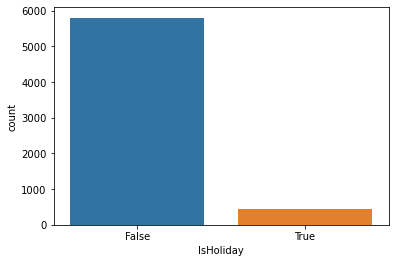

In [56]:
sns.countplot(x='IsHoliday', data=df1)

- Promotion과 Weekly_Sales scatter plot
- Weekly_Sales과 Promotion 관계 알아보기

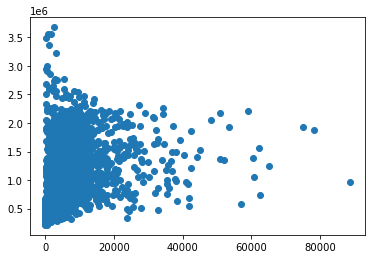

In [29]:
plt.scatter(x='Promotion1', y='Weekly_Sales', data=df1)
plt.show()

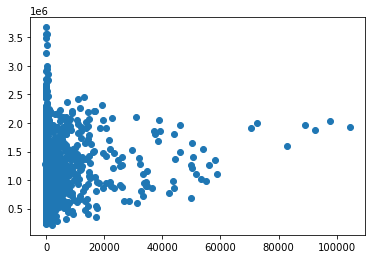

In [30]:
plt.scatter(x='Promotion2', y='Weekly_Sales', data=df1)
plt.show()

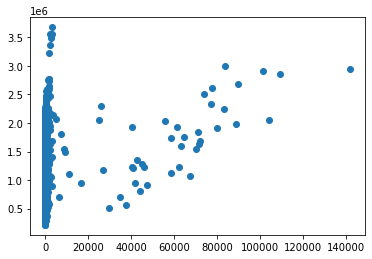

In [31]:
plt.scatter(x='Promotion3', y='Weekly_Sales', data=df1)
plt.show()

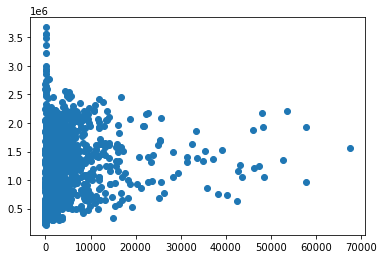

In [32]:
plt.scatter(x='Promotion4', y='Weekly_Sales', data=df1)
plt.show()

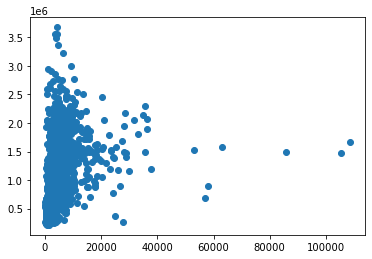

In [33]:
plt.scatter(x='Promotion5', y='Weekly_Sales', data=df1)
plt.show()

In [34]:
df1_1=df1[df1['Store']==1]
df1_1

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,0,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,1,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,0,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,0,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,0,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,1,31/08/2012,80.49,3.638,21442.73,102.32,21.70,13209.64,3032.96,6.908,0,1582083.40
135,136,1,07/09/2012,83.96,3.730,5204.68,35.74,50.94,4120.32,2737.17,6.908,1,1661767.33
136,137,1,14/09/2012,74.97,3.717,17212.52,7.00,18.79,1523.11,7992.72,6.908,0,1517428.87
137,138,1,21/09/2012,69.87,3.721,6352.30,7.64,4.69,1010.06,6456.71,6.908,0,1506126.06


## store 별 weekly_sales 시각화하기

- 결측치 뺀값 count

In [36]:
df[df['Promotion1'].isna()==False]['Promotion1'].count()

2102

In [37]:
df[df['Promotion2'].isna()==False]['Promotion2'].count()

1592

In [38]:
df[df['Promotion3'].isna()==False]['Promotion3'].count()

1885

In [39]:
df[df['Promotion4'].isna()==False]['Promotion4'].count()

1819

In [40]:
df[df['Promotion5'].isna()==False]['Promotion5'].count()

2115

In [41]:
df[df['Promotion1'].isna()==False]['Weekly_Sales'].mean()

1075150.3495337781

In [42]:
df[df['Promotion2'].isna()==False]['Weekly_Sales'].mean()

1162937.6042839196

In [43]:
df[df['Promotion3'].isna()==False]['Weekly_Sales'].mean()

1125100.6159045093

In [44]:
df[df['Promotion4'].isna()==False]['Weekly_Sales'].mean()

1171045.1504727872

In [45]:
df[df['Promotion5'].isna()==False]['Weekly_Sales'].mean()

1071090.3508179677

In [46]:
Promotion=df1[['Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5','Weekly_Sales']]
Promotion

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Weekly_Sales
0,NaN,NaN,NaN,NaN,NaN,1643690.90
1,NaN,NaN,NaN,NaN,NaN,1641957.44
2,NaN,NaN,NaN,NaN,NaN,1611968.17
3,NaN,NaN,NaN,NaN,NaN,1409727.59
4,NaN,NaN,NaN,NaN,NaN,1554806.68
...,...,...,...,...,...,...
6250,23641.30,6.00,92.93,6988.31,3992.13,734297.87
6251,11024.45,12.80,52.63,1854.77,2055.70,766512.66
6252,11407.95,NaN,4.30,3421.72,5268.92,702238.27
6253,8452.20,92.28,63.24,2376.38,8670.40,723086.20


In [47]:
Promotion=Promotion.dropna()
Promotion

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Weekly_Sales
92,10382.90,6115.67,215.07,2406.62,6551.42,1594938.89
93,6074.12,254.39,51.98,427.39,5988.57,1539483.70
94,410.31,98.00,55805.51,8.00,554.92,2033320.66
95,5629.51,68.00,1398.11,2084.64,20475.32,1584083.95
96,4640.65,19.00,105.02,3639.42,14461.82,1799682.38
...,...,...,...,...,...,...
6249,7936.20,58.38,22.00,5518.07,2291.97,718232.26
6250,23641.30,6.00,92.93,6988.31,3992.13,734297.87
6251,11024.45,12.80,52.63,1854.77,2055.70,766512.66
6253,8452.20,92.28,63.24,2376.38,8670.40,723086.20


In [48]:
Promotion.isnull().sum()

Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Weekly_Sales    0
dtype: int64

In [49]:
df1.corr()

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
id,1.000000e+00,9.997531e-01,-0.019554,0.075666,-0.157843,-0.042932,-0.039226,-0.015269,-0.051893,0.218548,1.475431e-16,-0.335276
Store,9.997531e-01,1.000000e+00,-0.022895,0.058628,-0.158183,-0.040512,-0.037557,-0.015109,-0.051439,0.223808,1.547191e-16,-0.335569
Temperature,-1.955428e-02,-2.289476e-02,1.000000,0.148054,-0.059489,-0.323549,-0.097627,-0.072568,-0.027799,0.102688,-1.555954e-01,-0.063231
Fuel_Price,7.566586e-02,5.862843e-02,0.148054,1.000000,0.087613,-0.214387,-0.095478,-0.028819,-0.116167,-0.025728,-7.148479e-02,0.010986
Promotion1,-1.578430e-01,-1.581835e-01,-0.059489,0.087613,1.000000,0.028262,-0.108023,0.820015,0.173296,0.030090,-4.375904e-02,0.317564
Promotion2,-4.293211e-02,-4.051200e-02,-0.323549,-0.214387,0.028262,1.000000,-0.049666,-0.009585,-0.006747,0.017877,3.264987e-01,0.094407
Promotion3,-3.922622e-02,-3.755728e-02,-0.097627,-0.095478,-0.108023,-0.049666,1.000000,-0.073920,-0.024157,0.008663,4.162788e-01,0.199661
Promotion4,-1.526918e-02,-1.510892e-02,-0.072568,-0.028819,0.820015,-0.009585,-0.073920,1.000000,0.107567,0.017714,-9.818811e-03,0.162143
Promotion5,-5.189250e-02,-5.143911e-02,-0.027799,-0.116167,0.173296,-0.006747,-0.024157,0.107567,1.000000,-0.007787,-5.648109e-02,0.297707
Unemployment,2.185480e-01,2.238084e-01,0.102688,-0.025728,0.030090,0.017877,0.008663,0.017714,-0.007787,1.000000,6.666948e-03,-0.107331


<AxesSubplot:>

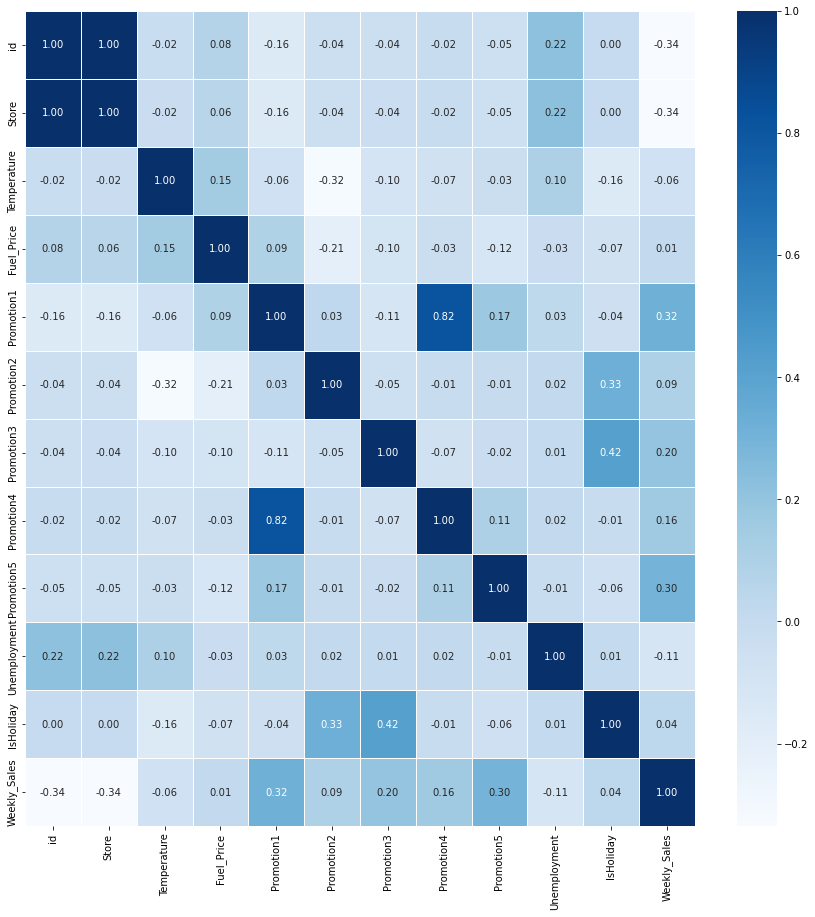

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 결측치 처리

- 0으로 결측치 채우기

In [51]:
df1[['Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5']].describe()

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5
count,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000
mean,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173
std,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908
min,0.270000,-265.760000,-29.100000,0.410000,135.160000
25%,1844.295000,39.755000,4.700000,499.895000,1742.305000
50%,5221.140000,205.410000,24.600000,1532.630000,3226.410000
75%,9199.242500,1931.005000,104.010000,3640.905000,5444.030000
max,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000


In [52]:
df1['Promotion1']=df1['Promotion1'].fillna(0)

In [53]:
df1['Promotion2']=df1['Promotion2'].fillna(0)

In [54]:
df1['Promotion3']=df1['Promotion3'].fillna(0)

In [55]:
df1['Promotion4']=df1['Promotion4'].fillna(0)

In [56]:
df1['Promotion5']=df1['Promotion5'].fillna(0)

## 날짜 분리하기

In [66]:
def yy(df1):
    return df1.split('/')[2]
df1['year']=df1['Date'].apply(yy)

In [67]:
def mm(df1):
    return df1.split('/')[1]
df1['month']=df1['Date'].apply(mm)

In [68]:
def dd(df1):
    return df1.split('/')[0]
df1['day']=df1['Date'].apply(dd)

In [69]:
df1=df1.drop('Date', axis=1)

In [70]:
df1['year']=pd.to_numeric(df1['year'])
df1['month']=pd.to_numeric(df1['month'])
df1['day']=pd.to_numeric(df1['day'])

## 랜덤포레스트

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [73]:
df1=df1.drop(['id'],axis=1)

In [74]:
x=df1.drop(['Weekly_Sales'], axis=1)
y=df1['Weekly_Sales']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)

In [75]:
x_train.shape, x_test.shape

((4378, 13), (1877, 13))

- RobustScaler 사용

In [76]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [77]:
forest=RandomForestRegressor(n_estimators=100)
forest.fit(x_train, y_train)

RandomForestRegressor()

In [78]:
prediction = forest.predict(x_test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[ 672995.7189 1751618.3561 1203932.5073  439455.2799 1142647.8654
 1984600.8406 1328185.2576  530035.0295 2132468.0434 1305551.219 ]


## test set

In [57]:
test=pd.read_csv('test.csv')

In [58]:
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
3,4,1,26/10/2012,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,05/10/2012,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False
...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,26/10/2012,46.97,3.755,38.65,2.61,0.98,NaN,457.74,5.217,False
176,177,45,05/10/2012,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,8.667,False
177,178,45,12/10/2012,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,8.667,False
178,179,45,19/10/2012,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,8.667,False


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            180 non-null    int64  
 1   Store         180 non-null    int64  
 2   Date          180 non-null    object 
 3   Temperature   180 non-null    float64
 4   Fuel_Price    180 non-null    float64
 5   Promotion1    178 non-null    float64
 6   Promotion2    45 non-null     float64
 7   Promotion3    161 non-null    float64
 8   Promotion4    146 non-null    float64
 9   Promotion5    180 non-null    float64
 10  Unemployment  180 non-null    float64
 11  IsHoliday     180 non-null    bool   
dtypes: bool(1), float64(8), int64(2), object(1)
memory usage: 15.8+ KB


In [61]:
test.isnull().sum()

id                0
Store             0
Date              0
Temperature       0
Fuel_Price        0
Promotion1        2
Promotion2      135
Promotion3       19
Promotion4       34
Promotion5        0
Unemployment      0
IsHoliday         0
dtype: int64

In [94]:
def yy(test):
    return test.split('/')[2]
test['year']=test['Date'].apply(yy)

In [95]:
def mm(test):
    return test.split('/')[1]
test['month']=test['Date'].apply(mm)

In [96]:
def dd(test):
    return test.split('/')[0]
test['day']=test['Date'].apply(dd)

In [97]:
test=test.drop('Date', axis=1)

In [98]:
test['year']=pd.to_numeric(test['year'])
test['month']=pd.to_numeric(test['month'])
test['day']=pd.to_numeric(test['day'])

In [99]:
test['Promotion1']=test['Promotion1'].fillna(0)
test['Promotion2']=test['Promotion2'].fillna(0)
test['Promotion3']=test['Promotion3'].fillna(0)
test['Promotion4']=test['Promotion4'].fillna(0)
test['Promotion5']=test['Promotion5'].fillna(0)

In [100]:
test['IsHoliday']=test['IsHoliday'].astype(int)

In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            180 non-null    int64  
 1   Store         180 non-null    int64  
 2   Temperature   180 non-null    float64
 3   Fuel_Price    180 non-null    float64
 4   Promotion1    180 non-null    float64
 5   Promotion2    180 non-null    float64
 6   Promotion3    180 non-null    float64
 7   Promotion4    180 non-null    float64
 8   Promotion5    180 non-null    float64
 9   Unemployment  180 non-null    float64
 10  IsHoliday     180 non-null    int32  
 11  year          180 non-null    int64  
 12  month         180 non-null    int64  
 13  day           180 non-null    int64  
dtypes: float64(8), int32(1), int64(5)
memory usage: 19.1 KB


In [102]:
test=test.drop('id', axis=1)

In [103]:
prediction=forest.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[863811.1799 856467.0296 855914.2317 856277.5294 861721.4652 863700.88
 857640.2437 885695.5374 856353.4196 856199.8384]


In [105]:
sample_submission=pd.read_csv('sample_submission.csv')

In [106]:
sample_submission['Weekly_Sales']=prediction
sample_submission.head()

,id,Weekly_Sales
0,1,863811.1799
1,2,856467.0296
2,3,855914.2317
3,4,856277.5294
4,5,861721.4652


In [109]:
sample_submission.to_csv('submission1.csv', index=False)